In [88]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

In [89]:
#Reading the Apple news sentiment file
df2 = pd.read_csv("stock_news_sentiment_analysis_results_AAPL.csv")

In [90]:
#Deleting the ticker column since all of them are AAPL
df = df2.drop(['Ticker'],axis=1)

In [91]:
df

,Date,Weighted compound sentiment score
0,2011-06-07,-0.700300
1,2011-06-14,0.296000
2,2011-06-20,-0.128000
3,2011-07-07,0.472800
4,2011-07-13,0.921700
...,...,...
1786,2024-03-11,0.088800
1787,2024-03-12,0.108727
1788,2024-03-13,-0.220712
1789,2024-03-14,-0.327244


In [92]:
#Now we define a new dataframe called data from yfinance which will contain the stock price of apple on a specified date range.
# Define the stock ticker and date range
ticker = 'AAPL'
start_date = '2011-06-01'
end_date = '2024-03-20'

# Fetch the data using yfinance
data = yf.download(ticker, start=start_date, end=end_date)

# Filter to only include columns: Open, Close, and Volume
data = data[['Open', 'Close', 'Volume']]

# Display the DataFrame
data

[*********************100%***********************]  1 of 1 completed


,Open,Close,Volume
Date,,,
2011-06-01,12.459643,12.339643,554682800
2011-06-02,12.375000,12.360714,338783200
2011-06-03,12.256429,12.265714,313250000
2011-06-06,12.346429,12.072857,461941200
2011-06-07,12.077500,11.858571,529785200
...,...,...,...
2024-03-13,172.770004,171.130005,52488700
2024-03-14,172.910004,173.000000,72913500
2024-03-15,171.169998,172.619995,121664700


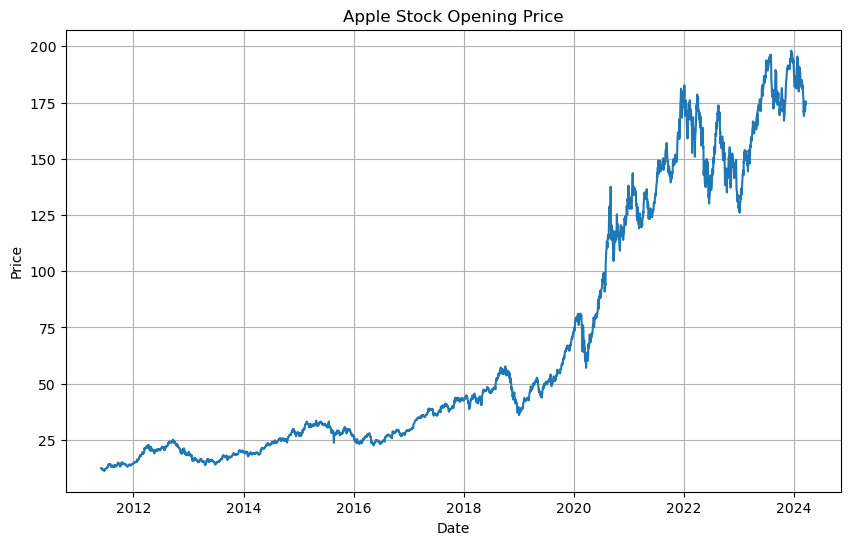

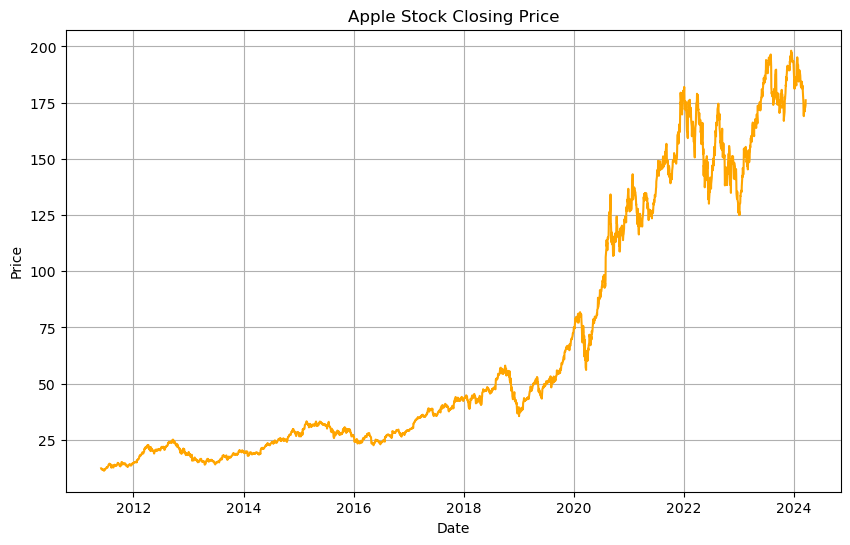

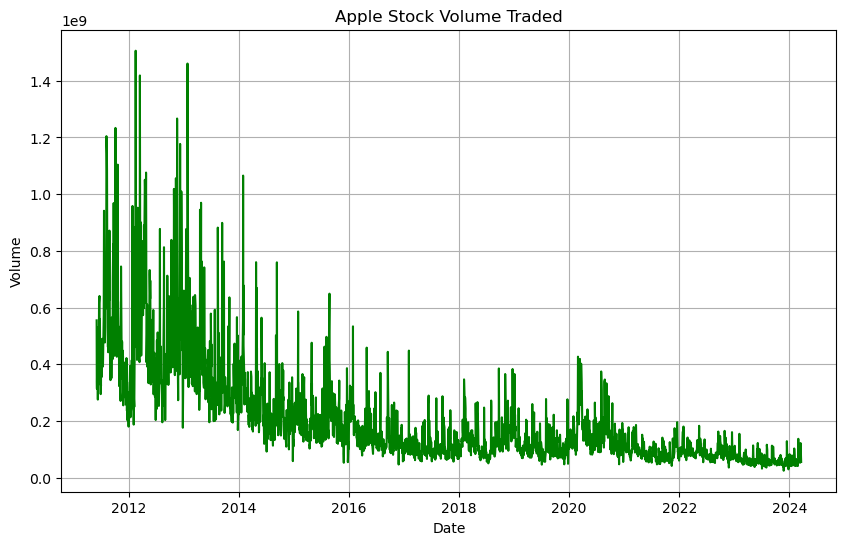

In [93]:
#Let's plot the columns of data i.e. the stock price of apple
import matplotlib.pyplot as plt

# Plot each column separately
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Open'], label='Opening Price')
plt.title('Apple Stock Opening Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Closing Price', color='orange')
plt.title('Apple Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Volume'], label='Volume Traded', color='green')
plt.title('Apple Stock Volume Traded')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

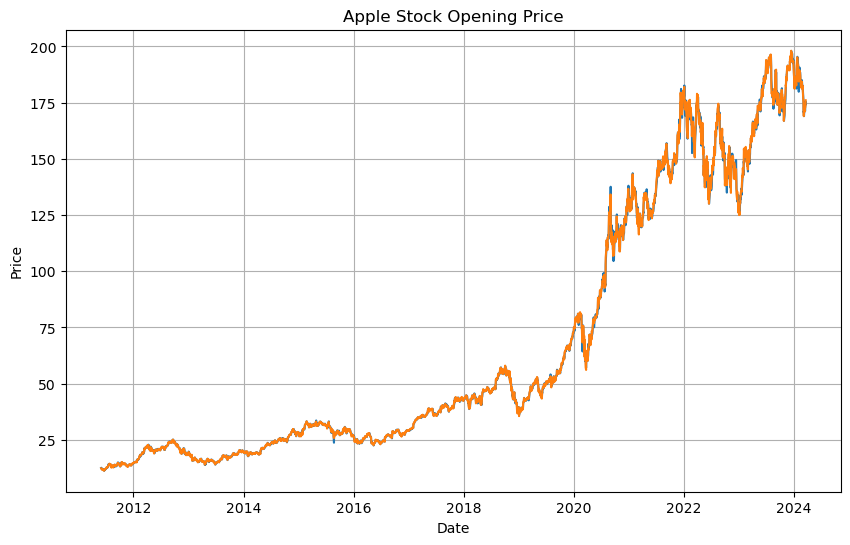

In [94]:
# Plot each column separately
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Open'],data['Close'], label='Opening Price')
plt.title('Apple Stock Opening Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

C:\Users\yaman\AppData\Local\Temp\ipykernel_22544\1373689212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LogDiff_Open'] = np.log(data['Open'] / data['Open'].shift(1))
C:\Users\yaman\AppData\Local\Temp\ipykernel_22544\1373689212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LogDiff_Close'] = np.log(data['Close'] / data['Close'].shift(1))


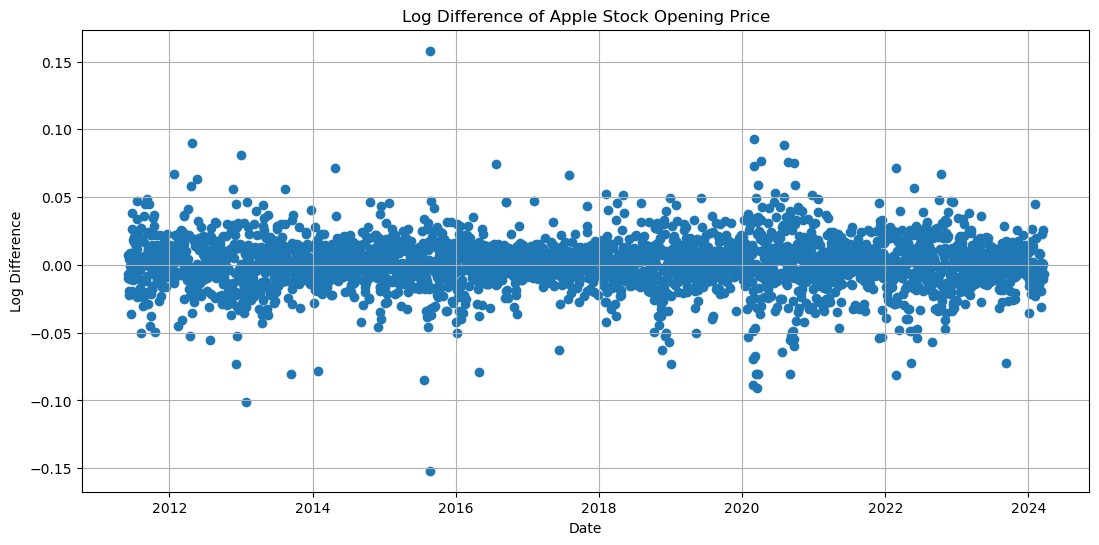

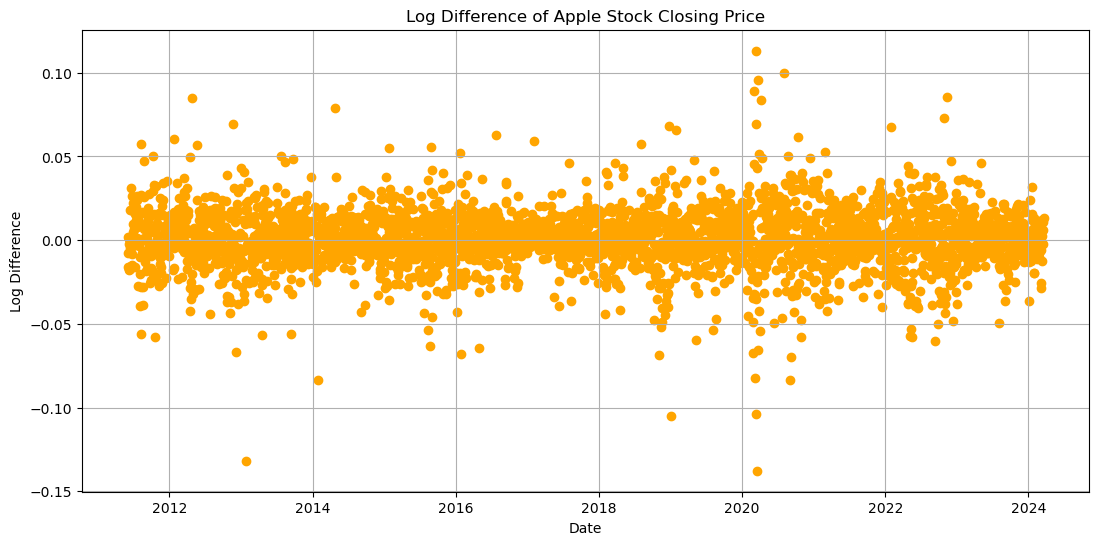

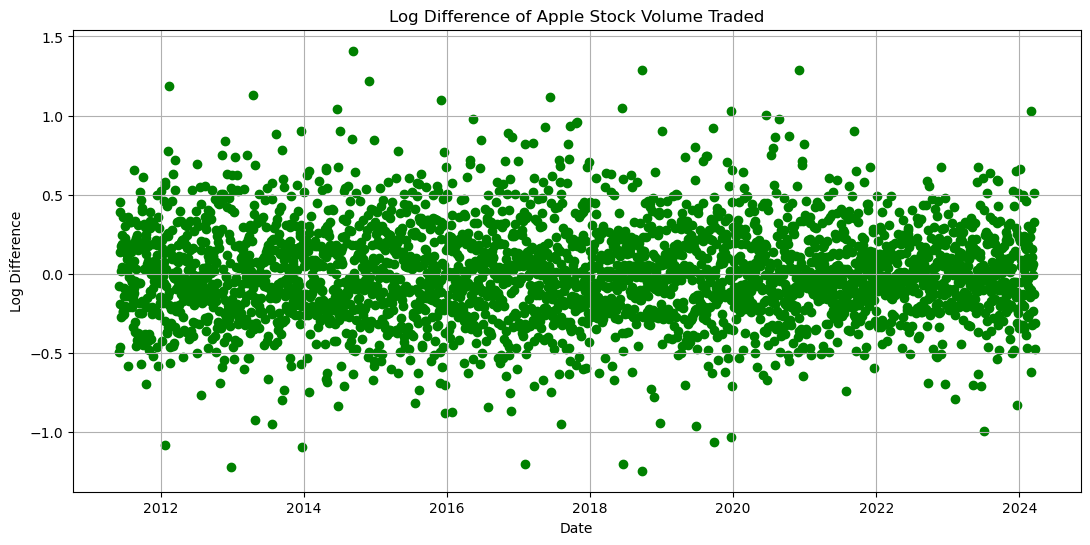

In [95]:
#Let's just look at log differences of the features like closing price, opening price, volume traded.
import numpy as np
# Calculate log differences
data['LogDiff_Open'] = np.log(data['Open'] / data['Open'].shift(1))
data['LogDiff_Close'] = np.log(data['Close'] / data['Close'].shift(1))
data['LogDiff_Volume'] = np.log(data['Volume'] / data['Volume'].shift(1))

# Plot each log difference separately
plt.figure(figsize=(13, 6))
plt.scatter(data.index, data['LogDiff_Open'], label='Log Difference of Opening Price')
plt.title('Log Difference of Apple Stock Opening Price')
plt.xlabel('Date')
plt.ylabel('Log Difference')
plt.grid(True)
plt.show()

plt.figure(figsize=(13, 6))
plt.scatter(data.index, data['LogDiff_Close'], label='Log Difference of Closing Price', color='orange')
plt.title('Log Difference of Apple Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Log Difference')
plt.grid(True)
plt.show()

plt.figure(figsize=(13, 6))
plt.scatter(data.index, data['LogDiff_Volume'], label='Log Difference of Volume Traded', color='green')
plt.title('Log Difference of Apple Stock Volume Traded')
plt.xlabel('Date')
plt.ylabel('Log Difference')
plt.grid(True)
plt.show()

In [96]:
#Hypothsis: Predicted opening price on day d is the arithmetic mean of (d-1)^th and (d+1)^th day.
data['Predicted_Open_am'] = 2 * data['Open'].shift(1) - data['Open'].shift(2)

In [97]:
#Hypothsis: Predicted Closing price on day d is the arithmetic mean of (d-1)^th and (d+1)^th day.
data['Predicted_Close_am'] = 2 * data['Close'].shift(1) - data['Close'].shift(2)

In [98]:
#Hypothsis: Predicted closing price on day d is the geometric mean of (d-1)^th and (d+1)^th day.
data['Predicted_Close_gm'] = (data['Close'].shift(1))**2/data['Close'].shift(2)

In [99]:
data

,Open,Close,Volume,LogDiff_Open,LogDiff_Close,LogDiff_Volume,Predicted_Open_am,Predicted_Close_am,Predicted_Close_gm
Date,,,,,,,,,
2011-06-01,12.459643,12.339643,554682800,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,12.375000,12.360714,338783200,-0.006817,0.001706,-0.493036,NaN,NaN,NaN
2011-06-03,12.256429,12.265714,313250000,-0.009628,-0.007715,-0.078359,12.290357,12.381785,12.381821
2011-06-06,12.346429,12.072857,461941200,0.007316,-0.015848,0.388436,12.137857,12.170713,12.171444
2011-06-07,12.077500,11.858571,529785200,-0.022023,-0.017909,0.137034,12.436429,11.880000,11.883032
...,...,...,...,...,...,...,...,...,...
2024-03-13,172.770004,171.130005,52488700,-0.002197,-0.012197,-0.130832,173.359985,173.709991,173.711325
2024-03-14,172.910004,173.000000,72913500,0.000810,0.010868,0.328676,172.390015,169.030014,169.055471
2024-03-15,171.169998,172.619995,121664700,-0.010114,-0.002199,0.511995,173.050003,174.869995,174.890429


In [100]:
# Reset the index to make Date a column instead of the index
data = data.reset_index()

# Display the DataFrame with Date as a column
data

,Date,Open,Close,Volume,LogDiff_Open,LogDiff_Close,LogDiff_Volume,Predicted_Open_am,Predicted_Close_am,Predicted_Close_gm
0,2011-06-01,12.459643,12.339643,554682800,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-06-02,12.375000,12.360714,338783200,-0.006817,0.001706,-0.493036,NaN,NaN,NaN
2,2011-06-03,12.256429,12.265714,313250000,-0.009628,-0.007715,-0.078359,12.290357,12.381785,12.381821
3,2011-06-06,12.346429,12.072857,461941200,0.007316,-0.015848,0.388436,12.137857,12.170713,12.171444
4,2011-06-07,12.077500,11.858571,529785200,-0.022023,-0.017909,0.137034,12.436429,11.880000,11.883032
...,...,...,...,...,...,...,...,...,...,...
3216,2024-03-13,172.770004,171.130005,52488700,-0.002197,-0.012197,-0.130832,173.359985,173.709991,173.711325
3217,2024-03-14,172.910004,173.000000,72913500,0.000810,0.010868,0.328676,172.390015,169.030014,169.055471
3218,2024-03-15,171.169998,172.619995,121664700,-0.010114,-0.002199,0.511995,173.050003,174.869995,174.890429
3219,2024-03-18,175.570007,173.720001,75604200,0.025381,0.006352,-0.475757,169.429993,172.239990,172.240825


In [101]:
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

In [102]:
# Merge df with data based on the 'Date' column
df = df.merge(data[['Date', 'Close']], on='Date', how='left')
df = df.merge(data[['Date', 'Predicted_Close_gm']], on='Date', how='left')

In [103]:
df

,Date,Weighted compound sentiment score,Close,Predicted_Close_gm
0,2011-06-07,-0.700300,11.858571,11.883032
1,2011-06-14,0.296000,11.872857,11.689339
2,2011-06-20,-0.128000,11.261429,11.265494
3,2011-07-07,0.472800,12.757143,12.646625
4,2011-07-13,0.921700,12.786429,12.625008
...,...,...,...,...
1786,2024-03-11,0.088800,172.750000,172.477701
1787,2024-03-12,0.108727,173.229996,174.793904
1788,2024-03-13,-0.220712,171.130005,173.711325
1789,2024-03-14,-0.327244,173.000000,169.055471


In [104]:
#Making a binary variable 0 or 1 if the Actual closing price is greater than the predicted closing price.
df['close_diff'] = (df['Predicted_Close_gm'] > df['Close']).astype(int)

In [105]:
df['Previous_Score'] = df['Weighted compound sentiment score'].shift(1)

In [106]:
df

,Date,Weighted compound sentiment score,Close,Predicted_Close_gm,close_diff,Previous_Score
0,2011-06-07,-0.700300,11.858571,11.883032,1,NaN
1,2011-06-14,0.296000,11.872857,11.689339,0,-0.700300
2,2011-06-20,-0.128000,11.261429,11.265494,1,0.296000
3,2011-07-07,0.472800,12.757143,12.646625,0,-0.128000
4,2011-07-13,0.921700,12.786429,12.625008,0,0.472800
...,...,...,...,...,...,...
1786,2024-03-11,0.088800,172.750000,172.477701,0,0.228573
1787,2024-03-12,0.108727,173.229996,174.793904,1,0.088800
1788,2024-03-13,-0.220712,171.130005,173.711325,1,0.108727
1789,2024-03-14,-0.327244,173.000000,169.055471,0,-0.220712


In [107]:
df

,Date,Weighted compound sentiment score,Close,Predicted_Close_gm,close_diff,Previous_Score
0,2011-06-07,-0.700300,11.858571,11.883032,1,NaN
1,2011-06-14,0.296000,11.872857,11.689339,0,-0.700300
2,2011-06-20,-0.128000,11.261429,11.265494,1,0.296000
3,2011-07-07,0.472800,12.757143,12.646625,0,-0.128000
4,2011-07-13,0.921700,12.786429,12.625008,0,0.472800
...,...,...,...,...,...,...
1786,2024-03-11,0.088800,172.750000,172.477701,0,0.228573
1787,2024-03-12,0.108727,173.229996,174.793904,1,0.088800
1788,2024-03-13,-0.220712,171.130005,173.711325,1,0.108727
1789,2024-03-14,-0.327244,173.000000,169.055471,0,-0.220712


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Ensure there are no missing values in 'Previous_Score' and 'close_diff'
df = df.dropna(subset=['Previous_Score', 'close_diff'])

# Define the input (X) and output (y) for the model
X = df[['Previous_Score']].values  # Input feature as a 2D array
y = df['close_diff'].values        # Output labels

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.59
Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       528
           1       0.00      0.00      0.00       367

    accuracy                           0.59       895
   macro avg       0.29      0.50      0.37       895
weighted avg       0.35      0.59      0.44       895



C:\Users\yaman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yaman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yaman\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
